In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
#load the dataset
data = pd.read_csv("Data.csv")

In [3]:
#read the data from the dataset
display(data.head(3))

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,21/09/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,25/09/2018 09:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,25/09/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#transfom the object to datetime
data.TransactionStartTime=pd.to_datetime(data.TransactionStartTime, dayfirst=True)
data.IssuedDateLoan=pd.to_datetime(data.IssuedDateLoan, dayfirst=True)
data.PaidOnDate=pd.to_datetime(data.PaidOnDate, dayfirst=True)
data.DueDate=pd.to_datetime(data.DueDate, dayfirst=True)

In [5]:
display(data.head(5))

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:00,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:00,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:00,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:00,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:00,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


### Explolatory Data Analysis 

In [6]:
#check for shape of the dataset
data.shape

(2100, 27)

In [7]:
#number of columns and rows
print(f"The number of columns in dataset: {data.shape[1]}\nThe number of rows in dataset: {data.shape[0]}")

The number of columns in dataset: 27
The number of rows in dataset: 2100


In [8]:
#describe the dataset
display(data.describe())

,TransactionStartTime,Value,Amount,CountryCode,TransactionStatus,IssuedDateLoan,AmountLoan,PaidOnDate,IsFinalPayBack,DueDate,IsThirdPartyConfirmed,IsDefaulted
count,2100,2.100000e+03,2.100000e+03,2100.0,2100.000000,1488,1.488000e+03,1488,1488.000000,1486,1488.000000,1488.000000
mean,2019-01-26 19:52:04.628571648,5.302947e+04,-5.291354e+04,256.0,0.708571,2019-01-27 03:43:55.322580736,1.182725e+04,2019-02-21 23:43:00.040322560,0.731855,2019-02-26 02:45:35.935397120,0.982527,0.119624
min,2018-09-21 12:17:00,1.000000e+02,-2.500000e+06,256.0,0.000000,2018-10-18 16:11:00,5.000000e+01,2018-10-22 09:13:00,0.000000,2018-11-17 16:11:00,0.000000,0.000000
25%,2018-12-24 03:36:30,1.000000e+03,-1.200000e+04,256.0,0.000000,2018-12-24 09:13:00,1.113750e+03,2019-01-20 11:24:45,0.000000,2019-01-23 09:13:00,1.000000,0.000000
50%,2019-02-06 09:07:00,3.500000e+03,-3.500000e+03,256.0,1.000000,2019-02-04 23:16:00,2.800000e+03,2019-02-22 03:48:00,1.000000,2019-03-06 23:16:00,1.000000,0.000000
75%,2019-02-26 21:21:00,1.200000e+04,-1.000000e+03,256.0,1.000000,2019-02-27 12:45:00,1.050000e+04,2019-03-28 13:59:30,1.000000,2019-03-29 12:45:00,1.000000,0.000000
max,2019-03-31 12:16:00,2.500000e+06,-1.000000e+02,256.0,1.000000,2019-03-31 12:16:00,2.760000e+06,2019-07-15 12:51:00,1.000000,2019-04-30 12:16:00,1.000000,1.000000
std,NaN,1.539498e+05,1.539653e+05,0.0,0.454529,NaN,7.666506e+04,NaN,0.443143,NaN,0.131070,0.324630


In [9]:
#features in the dataset
list(data.columns)

['CustomerId',
 'TransactionStartTime',
 'Value',
 'Amount',
 'TransactionId',
 'BatchId',
 'SubscriptionId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'TransactionStatus',
 'IssuedDateLoan',
 'AmountLoan',
 'Currency',
 'LoanId',
 'PaidOnDate',
 'IsFinalPayBack',
 'InvestorId',
 'DueDate',
 'LoanApplicationId',
 'PayBackId',
 'ThirdPartyId',
 'IsThirdPartyConfirmed',
 'IsDefaulted']

In [10]:
#number of fatures
print(data.shape[1])

27


In [11]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CustomerId             2100 non-null   object        
 1   TransactionStartTime   2100 non-null   datetime64[ns]
 2   Value                  2100 non-null   float64       
 3   Amount                 2100 non-null   float64       
 4   TransactionId          2100 non-null   object        
 5   BatchId                2100 non-null   object        
 6   SubscriptionId         2100 non-null   object        
 7   CurrencyCode           2100 non-null   object        
 8   CountryCode            2100 non-null   int64         
 9   ProviderId             2100 non-null   object        
 10  ProductId              2100 non-null   object        
 11  ProductCategory        2100 non-null   object        
 12  ChannelId              2100 non-null   object        
 13  Tra

In [12]:
#check for the null values
data.isnull().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

In [13]:
#split the data into test dataset and training dataset
data_columns = list(data.columns)
print(data_columns)

['CustomerId', 'TransactionStartTime', 'Value', 'Amount', 'TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStatus', 'IssuedDateLoan', 'AmountLoan', 'Currency', 'LoanId', 'PaidOnDate', 'IsFinalPayBack', 'InvestorId', 'DueDate', 'LoanApplicationId', 'PayBackId', 'ThirdPartyId', 'IsThirdPartyConfirmed', 'IsDefaulted']


In [14]:
#check the grace period
grace = data[data.PaidOnDate > data.DueDate]
display(grace.head(3))

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
26,CustomerId_474,2018-10-26 09:19:00,10000.0,-10000.0,TransactionId_2299,BatchId_500,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_934,2019-05-16 07:25:00,1.0,InvestorId_2,2018-11-25 09:18:00,LoanApplicationId_164,PayBackId_1899,ThirdPartyId_601,0.0,1.0
28,CustomerId_432,2018-10-26 16:12:00,31766.0,-30840.0,TransactionId_2128,BatchId_381,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_386,2019-04-26 16:24:00,1.0,InvestorId_2,2018-11-25 16:12:00,LoanApplicationId_836,PayBackId_1262,ThirdPartyId_1546,1.0,0.0
35,CustomerId_405,2018-11-01 16:12:00,53500.0,-50000.0,TransactionId_549,BatchId_2426,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_77,2018-12-06 09:26:00,0.0,InvestorId_2,2018-12-01 16:12:00,LoanApplicationId_534,PayBackId_165,ThirdPartyId_1760,1.0,0.0


<Axes: xlabel='IsDefaulted', ylabel='count'>

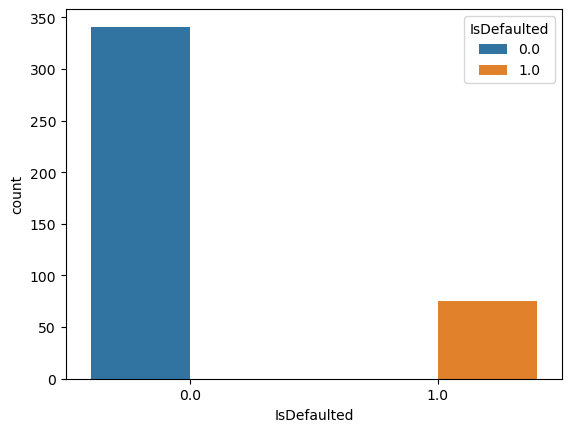

In [15]:
sns.countplot(grace, x='IsDefaulted', hue='IsDefaulted')

In [16]:
#total of defaults in original dataset
data[data.IsDefaulted == 1].value_counts().sum()

176

In [17]:
#after paidOnDate > DueDate
grace[grace.IsDefaulted == 1].value_counts().sum()

73

In [18]:
#defaults within a date
numOfDefaultsOnDate = data[(data.PaidOnDate > data.DueDate) & (data.IsDefaulted == 1)]

In [19]:
numOfDefaultsOnDate

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
26,CustomerId_474,2018-10-26 09:19:00,10000.0,-10000.0,TransactionId_2299,BatchId_500,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_934,2019-05-16 07:25:00,1.0,InvestorId_2,2018-11-25 09:18:00,LoanApplicationId_164,PayBackId_1899,ThirdPartyId_601,0.0,1.0
37,CustomerId_474,2018-11-01 17:56:00,5000.0,-5000.0,TransactionId_1452,BatchId_728,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1554,2019-07-15 09:12:00,0.0,InvestorId_2,2018-12-01 17:56:00,LoanApplicationId_937,PayBackId_1295,ThirdPartyId_1702,1.0,1.0
220,CustomerId_434,2018-11-30 15:55:00,14000.0,-14000.0,TransactionId_1954,BatchId_74,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_269,2019-01-25 15:00:00,0.0,InvestorId_1,2018-12-30 15:55:00,LoanApplicationId_706,PayBackId_677,ThirdPartyId_1628,1.0,1.0
221,CustomerId_434,2018-11-30 15:55:00,14000.0,-14000.0,TransactionId_1954,BatchId_74,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_269,2019-01-25 15:01:00,0.0,InvestorId_1,2018-12-30 15:55:00,LoanApplicationId_706,PayBackId_712,ThirdPartyId_611,1.0,1.0
503,CustomerId_503,2018-12-21 04:43:00,14999.0,-14999.0,TransactionId_1855,BatchId_387,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1338,2019-02-19 19:03:00,0.0,InvestorId_1,2019-01-20 04:43:00,LoanApplicationId_723,PayBackId_1417,ThirdPartyId_916,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,CustomerId_33,2019-03-06 07:50:00,192000.0,-192000.0,TransactionId_1679,BatchId_1735,SubscriptionId_6,UGX,256,ProviderId_1,...,LoanId_381,2019-04-08 11:19:00,0.0,InvestorId_2,2019-04-05 07:50:00,LoanApplicationId_1094,PayBackId_688,ThirdPartyId_578,1.0,1.0
1819,CustomerId_169,2019-03-06 07:54:00,192000.0,-192000.0,TransactionId_768,BatchId_369,SubscriptionId_6,UGX,256,ProviderId_1,...,LoanId_656,2019-04-09 18:54:00,0.0,InvestorId_2,2019-04-05 07:54:00,LoanApplicationId_1443,PayBackId_535,ThirdPartyId_680,1.0,1.0
1820,CustomerId_169,2019-03-06 07:54:00,192000.0,-192000.0,TransactionId_768,BatchId_369,SubscriptionId_6,UGX,256,ProviderId_1,...,LoanId_656,2019-04-30 19:09:00,0.0,InvestorId_2,2019-04-05 07:54:00,LoanApplicationId_1443,PayBackId_992,ThirdPartyId_1252,1.0,1.0
1849,CustomerId_158,2019-03-07 08:16:00,192000.0,-192000.0,TransactionId_2374,BatchId_1636,SubscriptionId_6,UGX,256,ProviderId_1,...,LoanId_1376,2019-05-20 08:15:00,0.0,InvestorId_2,2019-04-06 08:16:00,LoanApplicationId_323,PayBackId_1533,ThirdPartyId_1915,1.0,1.0


In [20]:
numOfDefaultsOnDate['diff_time'] = numOfDefaultsOnDate.PaidOnDate - numOfDefaultsOnDate.DueDate

C:\Users\ISSA\AppData\Local\Temp\ipykernel_23068\491949557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numOfDefaultsOnDate['diff_time'] = numOfDefaultsOnDate.PaidOnDate - numOfDefaultsOnDate.DueDate


In [21]:
numOfDefaultsOnDate

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,diff_time
26,CustomerId_474,2018-10-26 09:19:00,10000.0,-10000.0,TransactionId_2299,BatchId_500,SubscriptionId_1,UGX,256,ProviderId_1,...,2019-05-16 07:25:00,1.0,InvestorId_2,2018-11-25 09:18:00,LoanApplicationId_164,PayBackId_1899,ThirdPartyId_601,0.0,1.0,171 days 22:07:00
37,CustomerId_474,2018-11-01 17:56:00,5000.0,-5000.0,TransactionId_1452,BatchId_728,SubscriptionId_1,UGX,256,ProviderId_1,...,2019-07-15 09:12:00,0.0,InvestorId_2,2018-12-01 17:56:00,LoanApplicationId_937,PayBackId_1295,ThirdPartyId_1702,1.0,1.0,225 days 15:16:00
220,CustomerId_434,2018-11-30 15:55:00,14000.0,-14000.0,TransactionId_1954,BatchId_74,SubscriptionId_7,UGX,256,ProviderId_1,...,2019-01-25 15:00:00,0.0,InvestorId_1,2018-12-30 15:55:00,LoanApplicationId_706,PayBackId_677,ThirdPartyId_1628,1.0,1.0,25 days 23:05:00
221,CustomerId_434,2018-11-30 15:55:00,14000.0,-14000.0,TransactionId_1954,BatchId_74,SubscriptionId_7,UGX,256,ProviderId_1,...,2019-01-25 15:01:00,0.0,InvestorId_1,2018-12-30 15:55:00,LoanApplicationId_706,PayBackId_712,ThirdPartyId_611,1.0,1.0,25 days 23:06:00
503,CustomerId_503,2018-12-21 04:43:00,14999.0,-14999.0,TransactionId_1855,BatchId_387,SubscriptionId_7,UGX,256,ProviderId_1,...,2019-02-19 19:03:00,0.0,InvestorId_1,2019-01-20 04:43:00,LoanApplicationId_723,PayBackId_1417,ThirdPartyId_916,1.0,1.0,30 days 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,CustomerId_33,2019-03-06 07:50:00,192000.0,-192000.0,TransactionId_1679,BatchId_1735,SubscriptionId_6,UGX,256,ProviderId_1,...,2019-04-08 11:19:00,0.0,InvestorId_2,2019-04-05 07:50:00,LoanApplicationId_1094,PayBackId_688,ThirdPartyId_578,1.0,1.0,3 days 03:29:00
1819,CustomerId_169,2019-03-06 07:54:00,192000.0,-192000.0,TransactionId_768,BatchId_369,SubscriptionId_6,UGX,256,ProviderId_1,...,2019-04-09 18:54:00,0.0,InvestorId_2,2019-04-05 07:54:00,LoanApplicationId_1443,PayBackId_535,ThirdPartyId_680,1.0,1.0,4 days 11:00:00
1820,CustomerId_169,2019-03-06 07:54:00,192000.0,-192000.0,TransactionId_768,BatchId_369,SubscriptionId_6,UGX,256,ProviderId_1,...,2019-04-30 19:09:00,0.0,InvestorId_2,2019-04-05 07:54:00,LoanApplicationId_1443,PayBackId_992,ThirdPartyId_1252,1.0,1.0,25 days 11:15:00
1849,CustomerId_158,2019-03-07 08:16:00,192000.0,-192000.0,TransactionId_2374,BatchId_1636,SubscriptionId_6,UGX,256,ProviderId_1,...,2019-05-20 08:15:00,0.0,InvestorId_2,2019-04-06 08:16:00,LoanApplicationId_323,PayBackId_1533,ThirdPartyId_1915,1.0,1.0,43 days 23:59:00


In [22]:
data[data.LoanId == 'LoanId_1077']

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
495,CustomerId_419,2018-12-20 09:23:00,500.0,-500.0,TransactionId_1157,BatchId_1600,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1077,2019-01-23 10:47:00,0.0,InvestorId_1,2019-01-19 09:23:00,LoanApplicationId_1626,PayBackId_377,ThirdPartyId_1860,1.0,0.0
496,CustomerId_419,2018-12-20 09:23:00,500.0,-500.0,TransactionId_1157,BatchId_1600,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1077,2019-02-19 09:13:00,1.0,InvestorId_1,2019-01-19 09:23:00,LoanApplicationId_1626,PayBackId_1065,ThirdPartyId_283,1.0,0.0


In [23]:
multiloans=data.groupby('LoanId').size()[data.groupby('LoanId').size()>1]

In [24]:
multiloans

LoanId
LoanId_1005     2
LoanId_1017     2
LoanId_1038     2
LoanId_1046     2
LoanId_1051     2
               ..
LoanId_971      3
LoanId_98      10
LoanId_980      2
LoanId_981      2
LoanId_984      2
Length: 150, dtype: int64

In [25]:
data[data.LoanId == "LoanId_98"]

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
1739,CustomerId_256,2019-03-04 13:11:00,20000.0,-20000.0,TransactionId_1253,BatchId_2384,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_98,2019-03-28 14:58:00,0.0,InvestorId_2,2019-04-03 13:11:00,LoanApplicationId_997,PayBackId_1151,ThirdPartyId_247,1.0,0.0
1740,CustomerId_256,2019-03-04 13:11:00,20000.0,-20000.0,TransactionId_1253,BatchId_2384,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_98,2019-04-11 11:53:00,0.0,InvestorId_2,2019-04-03 13:11:00,LoanApplicationId_997,PayBackId_1778,ThirdPartyId_1674,1.0,0.0
1741,CustomerId_256,2019-03-04 13:11:00,20000.0,-20000.0,TransactionId_1253,BatchId_2384,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_98,2019-04-11 13:00:00,0.0,InvestorId_2,2019-04-03 13:11:00,LoanApplicationId_997,PayBackId_329,ThirdPartyId_1551,1.0,0.0
1742,CustomerId_256,2019-03-04 13:11:00,20000.0,-20000.0,TransactionId_1253,BatchId_2384,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_98,2019-04-12 21:57:00,0.0,InvestorId_2,2019-04-03 13:11:00,LoanApplicationId_997,PayBackId_1097,ThirdPartyId_344,1.0,0.0
1743,CustomerId_256,2019-03-04 13:11:00,20000.0,-20000.0,TransactionId_1253,BatchId_2384,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_98,2019-04-16 20:00:00,0.0,InvestorId_2,2019-04-03 13:11:00,LoanApplicationId_997,PayBackId_1155,ThirdPartyId_1498,1.0,0.0
1744,CustomerId_256,2019-03-04 13:11:00,20000.0,-20000.0,TransactionId_1253,BatchId_2384,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_98,2019-04-18 20:08:00,0.0,InvestorId_2,2019-04-03 13:11:00,LoanApplicationId_997,PayBackId_705,ThirdPartyId_1103,1.0,0.0
1745,CustomerId_256,2019-03-04 13:11:00,20000.0,-20000.0,TransactionId_1253,BatchId_2384,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_98,2019-04-25 11:16:00,0.0,InvestorId_2,2019-04-03 13:11:00,LoanApplicationId_997,PayBackId_2,ThirdPartyId_794,1.0,0.0
1746,CustomerId_256,2019-03-04 13:11:00,20000.0,-20000.0,TransactionId_1253,BatchId_2384,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_98,2019-04-25 15:39:00,0.0,InvestorId_2,2019-04-03 13:11:00,LoanApplicationId_997,PayBackId_1216,ThirdPartyId_528,1.0,0.0
1747,CustomerId_256,2019-03-04 13:11:00,20000.0,-20000.0,TransactionId_1253,BatchId_2384,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_98,2019-04-26 08:27:00,0.0,InvestorId_2,2019-04-03 13:11:00,LoanApplicationId_997,PayBackId_610,ThirdPartyId_1766,1.0,0.0
1748,CustomerId_256,2019-03-04 13:11:00,20000.0,-20000.0,TransactionId_1253,BatchId_2384,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_98,2019-04-26 09:10:00,1.0,InvestorId_2,2019-04-03 13:11:00,LoanApplicationId_997,PayBackId_1452,ThirdPartyId_296,1.0,0.0


In [26]:
data['Number_Of_Split_Payments'] = 0 ## this is a count on the number of payments on the same loan. It will take a 0 for singled-rowed transactions, 1+ for multi-row transacs.
data['Sum_Diff_Time_Payments'] = 0 ## I'm thinking of summing the delays between all payments made on a loan. It will take 0 for loans paid in a single time, 1+ for multiple payments on the same loan.

In [27]:
data[data.duplicated(subset=['TransactionId'],keep=False)].groupby('TransactionId').agg('count')['Number_Of_Split_Payments']

TransactionId
TransactionId_1020    2
TransactionId_1036    2
TransactionId_1039    7
TransactionId_1041    3
TransactionId_1056    2
                     ..
TransactionId_926     2
TransactionId_927     2
TransactionId_929     4
TransactionId_943     2
TransactionId_968     2
Name: Number_Of_Split_Payments, Length: 158, dtype: int64

In [28]:
data['Number_Of_Split_Payments']=data['TransactionId'].map(data.groupby('TransactionId').agg('count')['Number_Of_Split_Payments'])

In [29]:
display(data.tail(2))

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Sum_Diff_Time_Payments
2098,CustomerId_346,2019-03-31 09:37:00,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,1.0,InvestorId_1,2019-04-30 09:37:00,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0,1,0
2099,CustomerId_188,2019-03-31 12:16:00,1000.0,-1000.0,TransactionId_1889,BatchId_355,SubscriptionId_7,UGX,256,ProviderId_1,...,1.0,InvestorId_1,2019-04-30 12:16:00,LoanApplicationId_57,PayBackId_830,ThirdPartyId_899,1.0,0.0,1,0


In [30]:
data.groupby('TransactionId').CustomerId.nunique()[data.groupby('TransactionId').CustomerId.nunique()>1]

TransactionId
TransactionId_703    2
TransactionId_927    2
Name: CustomerId, dtype: int64

In [31]:
data[data.TransactionId=='TransactionId_927']
data[data.TransactionId=='TransactionId_703']

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Sum_Diff_Time_Payments
1124,CustomerId_48,2019-02-10 04:27:00,1100.0,-1100.0,TransactionId_703,BatchId_467,SubscriptionId_7,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,6,0
1126,CustomerId_48,2019-02-10 05:33:00,1500.0,-1500.0,TransactionId_703,BatchId_467,SubscriptionId_7,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,6,0
1969,CustomerId_50,2019-03-17 19:02:00,1000.0,-1000.0,TransactionId_703,BatchId_467,SubscriptionId_7,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,6,0
1971,CustomerId_50,2019-03-17 19:02:00,1000.0,-1000.0,TransactionId_703,BatchId_467,SubscriptionId_7,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,6,0
1973,CustomerId_50,2019-03-17 19:02:00,1000.0,-1000.0,TransactionId_703,BatchId_467,SubscriptionId_7,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,6,0
1975,CustomerId_50,2019-03-17 19:02:00,1000.0,-1000.0,TransactionId_703,BatchId_467,SubscriptionId_7,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,6,0


In [32]:
data.drop(data[(data.TransactionId=='TransactionId_703')|((data.TransactionId=='TransactionId_927'))].index,axis=0,inplace=True)

In [33]:
duplicated_transactions = data[data.duplicated(subset=['TransactionId'], keep=False)]

In [34]:
time_diff = (pd.to_datetime(duplicated_transactions.groupby('TransactionId')['PaidOnDate'].max()) - 
             pd.to_datetime(duplicated_transactions.groupby('TransactionId')['PaidOnDate'].min())).dt.total_seconds() / 3600

In [35]:
data['Sum_Diff_Time_Payments'] = data['TransactionId'].map(time_diff)

In [36]:
display(data)

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Sum_Diff_Time_Payments
0,CustomerId_27,2018-09-21 12:17:00,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1,NaN
1,CustomerId_27,2018-09-25 09:20:00,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1,NaN
2,CustomerId_27,2018-09-25 10:33:00,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1,NaN
3,CustomerId_27,2018-09-27 10:26:00,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1,NaN
4,CustomerId_27,2018-09-27 12:44:00,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:00,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,1.0,InvestorId_1,2019-04-29 21:55:00,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0,1,NaN
2096,CustomerId_28,2019-03-30 23:54:00,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,1.0,InvestorId_1,2019-04-29 23:53:00,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0,1,NaN
2097,CustomerId_34,2019-03-31 05:40:00,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,1.0,InvestorId_1,2019-04-30 05:40:00,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0,1,NaN
2098,CustomerId_346,2019-03-31 09:37:00,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,1.0,InvestorId_1,2019-04-30 09:37:00,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0,1,NaN


In [37]:
data.isnull().sum()

CustomerId                     0
TransactionStartTime           0
Value                          0
Amount                         0
TransactionId                  0
BatchId                        0
SubscriptionId                 0
CurrencyCode                   0
CountryCode                    0
ProviderId                     0
ProductId                      0
ProductCategory                0
ChannelId                      0
TransactionStatus              0
IssuedDateLoan               604
AmountLoan                   604
Currency                     604
LoanId                       604
PaidOnDate                   604
IsFinalPayBack               604
InvestorId                   604
DueDate                      606
LoanApplicationId            609
PayBackId                    604
ThirdPartyId                 606
IsThirdPartyConfirmed        604
IsDefaulted                  604
Number_Of_Split_Payments       0
Sum_Diff_Time_Payments      1602
dtype: int64

In [38]:
data['Day_Of_Week']= data.TransactionStartTime.dt.weekday

In [39]:
data['Day_in_month']=data.TransactionStartTime.dt.day

In [40]:
data.TransactionStartTime.min()

Timestamp('2018-09-21 12:17:00')

In [41]:
data.TransactionStartTime.max()

Timestamp('2019-03-31 12:16:00')

In [42]:
from datetime import date
datemin = date(2018,9,21)
datemax= date(2019,7,17)
(datemax-datemin).days

299

In [43]:
datesinc=pd.DataFrame(columns=['date','inc_value'])
datesinc.loc[0,'inc_value']=1
datesinc.loc[0,'date']=datemin

In [44]:
from datetime import timedelta

In [45]:
for i in range(2,301):
    datesinc.loc[i-1,'inc_value']=i
    datesinc.loc[i-1,'date']=datemin + timedelta(days=i-1)

In [46]:
data['inc_value_date']=data.TransactionStartTime.dt.date.map(datesinc.set_index('date').inc_value)

In [47]:
data.inc_value_date = data.inc_value_date.astype(np.int64)

In [48]:
data.tail()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Sum_Diff_Time_Payments,Day_Of_Week,Day_in_month,inc_value_date
2095,CustomerId_28,2019-03-30 21:55:00,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0,1,NaN,5,30,191
2096,CustomerId_28,2019-03-30 23:54:00,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0,1,NaN,5,30,191
2097,CustomerId_34,2019-03-31 05:40:00,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0,1,NaN,6,31,192
2098,CustomerId_346,2019-03-31 09:37:00,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0,1,NaN,6,31,192
2099,CustomerId_188,2019-03-31 12:16:00,1000.0,-1000.0,TransactionId_1889,BatchId_355,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanApplicationId_57,PayBackId_830,ThirdPartyId_899,1.0,0.0,1,NaN,6,31,192


In [49]:
data = data.drop("Sum_Diff_Time_Payments", axis=1)

In [50]:
data

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date
0,CustomerId_27,2018-09-21 12:17:00,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaT,NaN,NaN,NaN,NaN,NaN,1,4,21,1
1,CustomerId_27,2018-09-25 09:20:00,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaT,NaN,NaN,NaN,NaN,NaN,1,1,25,5
2,CustomerId_27,2018-09-25 10:33:00,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaT,NaN,NaN,NaN,NaN,NaN,1,1,25,5
3,CustomerId_27,2018-09-27 10:26:00,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaT,NaN,NaN,NaN,NaN,NaN,1,3,27,7
4,CustomerId_27,2018-09-27 12:44:00,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaT,NaN,NaN,NaN,NaN,NaN,1,3,27,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:00,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,2019-04-29 21:55:00,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0,1,5,30,191
2096,CustomerId_28,2019-03-30 23:54:00,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,2019-04-29 23:53:00,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0,1,5,30,191
2097,CustomerId_34,2019-03-31 05:40:00,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,2019-04-30 05:40:00,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0,1,6,31,192
2098,CustomerId_346,2019-03-31 09:37:00,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,2019-04-30 09:37:00,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0,1,6,31,192


In [51]:
#cleaning of data
columns_drop = ['CurrencyCode', 'CountryCode','Currency','ProviderId']

In [52]:
data = data.drop(columns=columns_drop, axis=1)

In [53]:
display(data)

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,ProductId,ProductCategory,ChannelId,...,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date
0,CustomerId_27,2018-09-21 12:17:00,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,ProductId_7,airtime,ChannelId_1,...,NaT,NaN,NaN,NaN,NaN,NaN,1,4,21,1
1,CustomerId_27,2018-09-25 09:20:00,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,ProductId_7,airtime,ChannelId_1,...,NaT,NaN,NaN,NaN,NaN,NaN,1,1,25,5
2,CustomerId_27,2018-09-25 10:33:00,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,ProductId_7,airtime,ChannelId_1,...,NaT,NaN,NaN,NaN,NaN,NaN,1,1,25,5
3,CustomerId_27,2018-09-27 10:26:00,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,ProductId_7,airtime,ChannelId_1,...,NaT,NaN,NaN,NaN,NaN,NaN,1,3,27,7
4,CustomerId_27,2018-09-27 12:44:00,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,ProductId_7,airtime,ChannelId_1,...,NaT,NaN,NaN,NaN,NaN,NaN,1,3,27,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:00,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,ProductId_8,data_bundles,ChannelId_1,...,2019-04-29 21:55:00,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0,1,5,30,191
2096,CustomerId_28,2019-03-30 23:54:00,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,ProductId_7,airtime,ChannelId_1,...,2019-04-29 23:53:00,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0,1,5,30,191
2097,CustomerId_34,2019-03-31 05:40:00,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,ProductId_3,airtime,ChannelId_1,...,2019-04-30 05:40:00,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0,1,6,31,192
2098,CustomerId_346,2019-03-31 09:37:00,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,ProductId_8,data_bundles,ChannelId_1,...,2019-04-30 09:37:00,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0,1,6,31,192


In [54]:
#check for the missing values
data.isnull().sum()

CustomerId                    0
TransactionStartTime          0
Value                         0
Amount                        0
TransactionId                 0
BatchId                       0
SubscriptionId                0
ProductId                     0
ProductCategory               0
ChannelId                     0
TransactionStatus             0
IssuedDateLoan              604
AmountLoan                  604
LoanId                      604
PaidOnDate                  604
IsFinalPayBack              604
InvestorId                  604
DueDate                     606
LoanApplicationId           609
PayBackId                   604
ThirdPartyId                606
IsThirdPartyConfirmed       604
IsDefaulted                 604
Number_Of_Split_Payments      0
Day_Of_Week                   0
Day_in_month                  0
inc_value_date                0
dtype: int64

In [55]:
aa = data[(data.TransactionStatus == 1) & (data.TransactionStartTime < data.DueDate)] \
    .groupby('CustomerId')['Value'] \
    .agg(['count', 'mean', 'std', 'min', 'max'])


In [56]:
data['before_due_mean'] = data['CustomerId'].map(aa['mean'])
data['before_due_std'] = data['CustomerId'].map(aa['std'])
data['before_due_min'] = data['CustomerId'].map(aa['min'])
data['before_due_max'] = data['CustomerId'].map(aa['max'])

In [57]:
data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,ProductId,ProductCategory,ChannelId,...,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_std,before_due_min,before_due_max
0,CustomerId_27,2018-09-21 12:17:00,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,ProductId_7,airtime,ChannelId_1,...,NaN,NaN,1,4,21,1,4364.285714,4854.436059,100.0,11000.0
1,CustomerId_27,2018-09-25 09:20:00,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,ProductId_7,airtime,ChannelId_1,...,NaN,NaN,1,1,25,5,4364.285714,4854.436059,100.0,11000.0
2,CustomerId_27,2018-09-25 10:33:00,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,ProductId_7,airtime,ChannelId_1,...,NaN,NaN,1,1,25,5,4364.285714,4854.436059,100.0,11000.0
3,CustomerId_27,2018-09-27 10:26:00,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,ProductId_7,airtime,ChannelId_1,...,NaN,NaN,1,3,27,7,4364.285714,4854.436059,100.0,11000.0
4,CustomerId_27,2018-09-27 12:44:00,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,ProductId_7,airtime,ChannelId_1,...,NaN,NaN,1,3,27,7,4364.285714,4854.436059,100.0,11000.0


In [58]:
data['Cnt_missed_payment']=0
data.loc[data.DueDate<data.PaidOnDate,'Cnt_missed_payment']=data[data.DueDate<data.PaidOnDate].groupby('CustomerId').cumcount()

In [59]:
con = data[data.IsThirdPartyConfirmed==1]
display(con)

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,ProductId,ProductCategory,ChannelId,...,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_std,before_due_min,before_due_max,Cnt_missed_payment
28,CustomerId_432,2018-10-26 16:12:00,31766.0,-30840.0,TransactionId_2128,BatchId_381,SubscriptionId_1,ProductId_6,tv,ChannelId_1,...,0.0,1,4,26,36,31766.000000,NaN,31766.0,31766.0,0
29,CustomerId_27,2018-10-30 10:25:00,500.0,-500.0,TransactionId_1569,BatchId_846,SubscriptionId_1,ProductId_4,data_bundles,ChannelId_1,...,0.0,1,1,30,40,4364.285714,4854.436059,100.0,11000.0,0
33,CustomerId_379,2018-11-01 14:53:00,1500.0,-1500.0,TransactionId_1024,BatchId_238,SubscriptionId_7,ProductId_3,airtime,ChannelId_1,...,0.0,1,3,1,42,1375.000000,231.455025,1000.0,1500.0,0
34,CustomerId_258,2018-11-01 15:23:00,10000.0,-10000.0,TransactionId_710,BatchId_1930,SubscriptionId_1,ProductId_7,airtime,ChannelId_1,...,0.0,1,3,1,42,23838.235294,29330.229337,5000.0,118450.0,0
35,CustomerId_405,2018-11-01 16:12:00,53500.0,-50000.0,TransactionId_549,BatchId_2426,SubscriptionId_1,ProductId_15,utility_bill,ChannelId_1,...,0.0,2,3,1,42,15763.684211,17264.356091,1000.0,53500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:00,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,ProductId_8,data_bundles,ChannelId_1,...,0.0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2096,CustomerId_28,2019-03-30 23:54:00,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,ProductId_7,airtime,ChannelId_1,...,0.0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2097,CustomerId_34,2019-03-31 05:40:00,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,ProductId_3,airtime,ChannelId_1,...,0.0,1,6,31,192,4800.000000,1622.639824,2000.0,7080.0,1
2098,CustomerId_346,2019-03-31 09:37:00,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,ProductId_8,data_bundles,ChannelId_1,...,0.0,1,6,31,192,2500.000000,1695.582496,1500.0,5500.0,0


In [60]:
data.Cnt_missed_payment.value_counts()

Cnt_missed_payment
0     1808
1       87
2       60
3       46
4       32
5       20
6       13
7        8
8        7
9        5
10       2
11       2
12       1
13       1
Name: count, dtype: int64

In [61]:
data.isnull().sum()

CustomerId                    0
TransactionStartTime          0
Value                         0
Amount                        0
TransactionId                 0
BatchId                       0
SubscriptionId                0
ProductId                     0
ProductCategory               0
ChannelId                     0
TransactionStatus             0
IssuedDateLoan              604
AmountLoan                  604
LoanId                      604
PaidOnDate                  604
IsFinalPayBack              604
InvestorId                  604
DueDate                     606
LoanApplicationId           609
PayBackId                   604
ThirdPartyId                606
IsThirdPartyConfirmed       604
IsDefaulted                 604
Number_Of_Split_Payments      0
Day_Of_Week                   0
Day_in_month                  0
inc_value_date                0
before_due_mean             334
before_due_std              435
before_due_min              334
before_due_max              334
Cnt_miss

In [62]:
data[data.IsDefaulted==1].describe()

,TransactionStartTime,Value,Amount,TransactionStatus,IssuedDateLoan,AmountLoan,PaidOnDate,IsFinalPayBack,DueDate,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_std,before_due_min,before_due_max,Cnt_missed_payment
count,178,178.000000,178.000000,178.0,178,178.000000,178,178.000000,178,178.000000,178.0,178.000000,178.000000,178.000000,178.000000,178.000000,152.000000,178.000000,178.000000,178.000000
mean,2019-02-19 17:38:11.460674048,203184.202247,-203168.528090,1.0,2019-02-19 17:38:10.786516992,18282.752809,2019-03-31 07:39:15.168539392,0.016854,2019-03-21 17:38:08.426966272,0.988764,1.0,4.269663,2.050562,16.106742,152.264045,201801.007661,2867.965143,199014.033708,203367.910112,0.410112
min,2018-10-26 09:19:00,1500.000000,-342000.000000,1.0,2018-10-26 09:19:00,500.000000,2018-12-01 14:41:00,0.000000,2018-11-25 09:18:00,0.000000,1.0,1.000000,0.000000,1.000000,36.000000,1166.666667,0.000000,500.000000,1500.000000,0.000000
25%,2019-02-15 12:01:00,192000.000000,-192000.000000,1.0,2019-02-15 12:01:00,14250.000000,2019-03-07 11:59:30,0.000000,2019-03-17 12:01:00,1.000000,1.0,2.000000,0.000000,6.250000,148.000000,192000.000000,0.000000,192000.000000,192000.000000,0.000000
50%,2019-02-27 08:06:00,192000.000000,-192000.000000,1.0,2019-02-27 08:06:00,16000.000000,2019-03-22 01:20:30,0.000000,2019-03-29 08:06:00,1.000000,1.0,4.000000,2.000000,15.000000,160.000000,192000.000000,0.000000,192000.000000,192000.000000,0.000000
75%,2019-03-04 07:04:00,192000.000000,-192000.000000,1.0,2019-03-04 07:04:00,20000.000000,2019-04-09 09:57:30,0.000000,2019-04-03 07:04:00,1.000000,1.0,6.000000,4.000000,25.000000,165.000000,192000.000000,0.000000,192000.000000,192000.000000,0.000000
max,2019-03-07 08:16:00,342000.000000,-1500.000000,1.0,2019-03-07 08:16:00,192000.000000,2019-07-15 09:12:00,1.000000,2019-04-06 08:16:00,1.000000,1.0,9.000000,6.000000,30.000000,168.000000,342000.000000,196876.441794,342000.000000,342000.000000,5.000000
std,NaN,101350.061263,101379.724638,0.0,NaN,18231.126391,NaN,0.129087,NaN,0.105700,0.0,2.576574,1.541415,8.977993,21.468751,100501.944919,22498.986157,103117.848520,100990.929738,0.935978


In [63]:
columns_missing = ['ChannelId','LoanApplicationId', 'ThirdPartyId','PayBackId','InvestorId','ProductId','LoanId','BatchId','TransactionStartTime','CustomerId','TransactionId','IssuedDateLoan','PaidOnDate','DueDate']

In [64]:
data = data.drop(columns_missing, axis='columns')

In [65]:
data=data[data.IsDefaulted.notnull()]

In [66]:
data

,Value,Amount,SubscriptionId,ProductCategory,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_std,before_due_min,before_due_max,Cnt_missed_payment
9,10000.0,-10000.0,SubscriptionId_4,airtime,1,10016.0,1.0,0.0,0.0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
10,10000.0,-10000.0,SubscriptionId_4,airtime,1,584.0,1.0,0.0,0.0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
11,10000.0,-10000.0,SubscriptionId_4,airtime,1,100.0,1.0,0.0,0.0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
13,5150.0,-5150.0,SubscriptionId_4,airtime,1,5614.0,1.0,0.0,0.0,1,4,19,29,7172.738095,13247.189863,500.0,53500.0,0
14,515.0,-515.0,SubscriptionId_4,airtime,1,544.0,1.0,0.0,0.0,1,4,19,29,7172.738095,13247.189863,500.0,53500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000.0,-2000.0,SubscriptionId_7,data_bundles,1,2370.0,1.0,1.0,0.0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2096,5000.0,-5000.0,SubscriptionId_7,airtime,1,5925.0,1.0,1.0,0.0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2097,5000.0,-5000.0,SubscriptionId_7,airtime,1,7100.0,1.0,1.0,0.0,1,6,31,192,4800.000000,1622.639824,2000.0,7080.0,1
2098,1500.0,-1500.0,SubscriptionId_7,data_bundles,1,1733.0,1.0,1.0,0.0,1,6,31,192,2500.000000,1695.582496,1500.0,5500.0,0


In [67]:
data.nunique()

Value                        87
Amount                       71
SubscriptionId                5
ProductCategory               7
TransactionStatus             1
AmountLoan                  647
IsFinalPayBack                2
IsThirdPartyConfirmed         2
IsDefaulted                   2
Number_Of_Split_Payments     12
Day_Of_Week                   7
Day_in_month                 31
inc_value_date              155
before_due_mean             124
before_due_std              110
before_due_min               33
before_due_max               50
Cnt_missed_payment           14
dtype: int64

In [68]:
sub_label = {"SubscriptionId_1":1,"SubscriptionId_2":2, "SubscriptionId_4":3,"SubscriptionId_5":4,"SubscriptionId_6":5,
             "SubscriptionId_7":6}
product_label = {'airtime':1,'data_bundles':2,'tv':3,'utility_bill':4, 'movies':5, 'financial_services':6, 'retail':7}
investor_label = {"InvestorId_1":1, "InvestorId_2": 2, "InvestorId_3":3}
label_map = {1:"Accepted", 0:"Rejected"}

In [69]:
data['SubscriptionId'] = data['SubscriptionId'].map(sub_label)
data['ProductCategory'] = data['ProductCategory'].map(product_label)
data['TransactionStatus'] = data['TransactionStatus'].map(label_map)

In [70]:
display(data)

,Value,Amount,SubscriptionId,ProductCategory,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_std,before_due_min,before_due_max,Cnt_missed_payment
9,10000.0,-10000.0,3,1,Accepted,10016.0,1.0,0.0,0.0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
10,10000.0,-10000.0,3,1,Accepted,584.0,1.0,0.0,0.0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
11,10000.0,-10000.0,3,1,Accepted,100.0,1.0,0.0,0.0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
13,5150.0,-5150.0,3,1,Accepted,5614.0,1.0,0.0,0.0,1,4,19,29,7172.738095,13247.189863,500.0,53500.0,0
14,515.0,-515.0,3,1,Accepted,544.0,1.0,0.0,0.0,1,4,19,29,7172.738095,13247.189863,500.0,53500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000.0,-2000.0,6,2,Accepted,2370.0,1.0,1.0,0.0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2096,5000.0,-5000.0,6,1,Accepted,5925.0,1.0,1.0,0.0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2097,5000.0,-5000.0,6,1,Accepted,7100.0,1.0,1.0,0.0,1,6,31,192,4800.000000,1622.639824,2000.0,7080.0,1
2098,1500.0,-1500.0,6,2,Accepted,1733.0,1.0,1.0,0.0,1,6,31,192,2500.000000,1695.582496,1500.0,5500.0,0


In [71]:
data.isnull().sum()

Value                        0
Amount                       0
SubscriptionId               0
ProductCategory              0
TransactionStatus            0
AmountLoan                   0
IsFinalPayBack               0
IsThirdPartyConfirmed        0
IsDefaulted                  0
Number_Of_Split_Payments     0
Day_Of_Week                  0
Day_in_month                 0
inc_value_date               0
before_due_mean              0
before_due_std              62
before_due_min               0
before_due_max               0
Cnt_missed_payment           0
dtype: int64

In [72]:
missing_cols = data.columns[data.isnull().any()]

In [73]:
display(missing_cols)

Index(['before_due_std'], dtype='object')

In [74]:
missing_columns = ['AmountLoan', 'IsFinalPayBack','IsThirdPartyConfirmed']
data[missing_columns] =data[missing_columns].fillna(0)
data['IsDefaulted'] =data['IsDefaulted'].fillna(1)
data.IsThirdPartyConfirmed = data.IsThirdPartyConfirmed.astype(int)
data.IsDefaulted = data.IsDefaulted.astype(int)
data.IsFinalPayBack = data.IsFinalPayBack.astype(int)

In [75]:
display(data)

,Value,Amount,SubscriptionId,ProductCategory,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_std,before_due_min,before_due_max,Cnt_missed_payment
9,10000.0,-10000.0,3,1,Accepted,10016.0,1,0,0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
10,10000.0,-10000.0,3,1,Accepted,584.0,1,0,0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
11,10000.0,-10000.0,3,1,Accepted,100.0,1,0,0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
13,5150.0,-5150.0,3,1,Accepted,5614.0,1,0,0,1,4,19,29,7172.738095,13247.189863,500.0,53500.0,0
14,515.0,-515.0,3,1,Accepted,544.0,1,0,0,1,4,19,29,7172.738095,13247.189863,500.0,53500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000.0,-2000.0,6,2,Accepted,2370.0,1,1,0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2096,5000.0,-5000.0,6,1,Accepted,5925.0,1,1,0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2097,5000.0,-5000.0,6,1,Accepted,7100.0,1,1,0,1,6,31,192,4800.000000,1622.639824,2000.0,7080.0,1
2098,1500.0,-1500.0,6,2,Accepted,1733.0,1,1,0,1,6,31,192,2500.000000,1695.582496,1500.0,5500.0,0


In [76]:
data.isnull().sum()

Value                        0
Amount                       0
SubscriptionId               0
ProductCategory              0
TransactionStatus            0
AmountLoan                   0
IsFinalPayBack               0
IsThirdPartyConfirmed        0
IsDefaulted                  0
Number_Of_Split_Payments     0
Day_Of_Week                  0
Day_in_month                 0
inc_value_date               0
before_due_mean              0
before_due_std              62
before_due_min               0
before_due_max               0
Cnt_missed_payment           0
dtype: int64

In [77]:
# display(data)

In [78]:
#encode the transaction status
mod_data = data.copy()

Text(0.5, 0, 'Transaction Status')

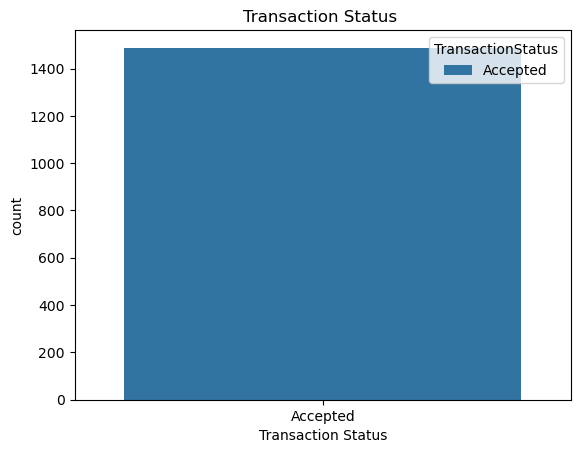

In [79]:
sns.countplot(x="TransactionStatus", hue="TransactionStatus", data=data)
plt.title("Transaction Status ")
plt.xlabel("Transaction Status")

In [80]:
label_map = {1:"Accepted", 0:"Rejected"}
data['TransactionStatus'] = data['TransactionStatus'].map(label_map)

Text(0.5, 1.0, 'Distribution of Product Category')

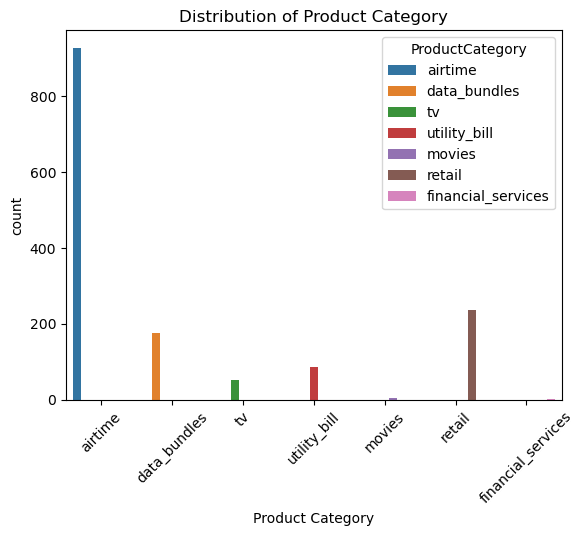

In [81]:
product_label = {1:'airtime',2:'data_bundles',3:'tv',4:'utility_bill', 5:'movies', 6:'financial_services', 7:'retail'}
data['ProductCategory'] = data['ProductCategory'].map(product_label)
sns.countplot(x="ProductCategory", hue="ProductCategory", data=data)
plt.xlabel("Product Category")
plt.xticks(
          rotation= 45, fontweight= 'light')
plt.title("Distribution of Product Category")

Text(0.5, 1.0, 'Distribution of Third Party Confirmed')

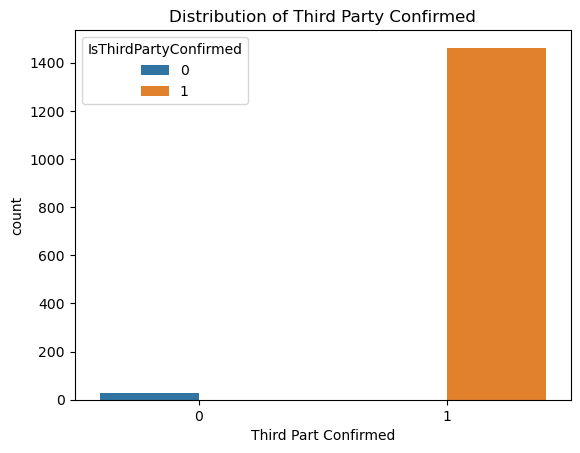

In [82]:
#Third Party Confirmed

sns.countplot(x="IsThirdPartyConfirmed", hue="IsThirdPartyConfirmed", data=data)
plt.xlabel("Third Part Confirmed")
plt.title("Distribution of Third Party Confirmed")

In [83]:
print(data.shape)

(1488, 18)


Text(0.5, 1.0, 'Distribution of Defaulted')

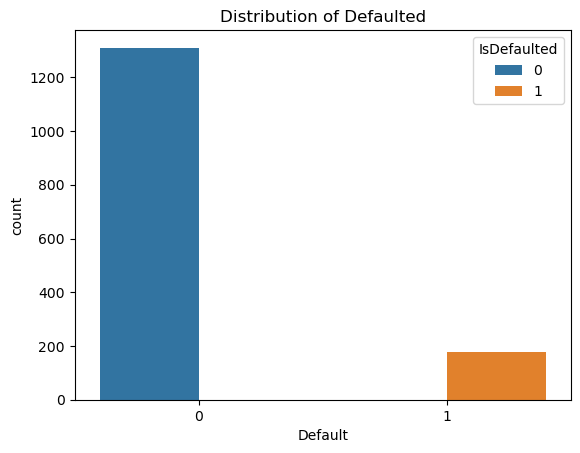

In [84]:
sns.countplot(x="IsDefaulted", hue="IsDefaulted", data=data)
plt.xlabel("Default")
plt.title("Distribution of Defaulted")


Text(0.5, 1.0, 'Distribution of Final Pay Back')

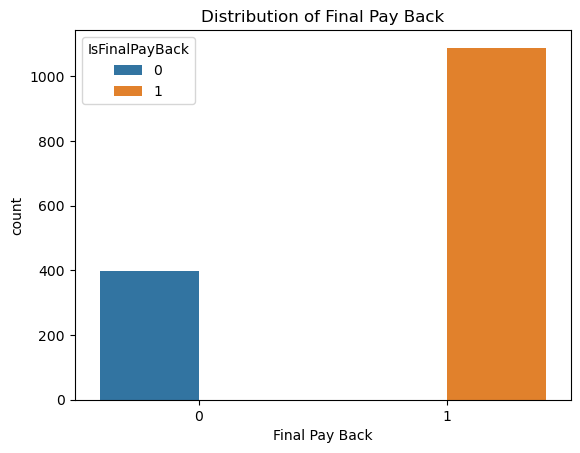

In [85]:
sns.countplot(x="IsFinalPayBack", hue="IsFinalPayBack", data=data)
plt.xlabel("Final Pay Back")
plt.title("Distribution of Final Pay Back")

In [86]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1488 entries, 9 to 2099
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Value                     1488 non-null   float64
 1   Amount                    1488 non-null   float64
 2   SubscriptionId            1488 non-null   int64  
 3   ProductCategory           1488 non-null   int64  
 4   TransactionStatus         1488 non-null   object 
 5   AmountLoan                1488 non-null   float64
 6   IsFinalPayBack            1488 non-null   int32  
 7   IsThirdPartyConfirmed     1488 non-null   int32  
 8   IsDefaulted               1488 non-null   int32  
 9   Number_Of_Split_Payments  1488 non-null   int64  
 10  Day_Of_Week               1488 non-null   int32  
 11  Day_in_month              1488 non-null   int32  
 12  inc_value_date            1488 non-null   int64  
 13  before_due_mean           1488 non-null   float64
 14  before_due_st

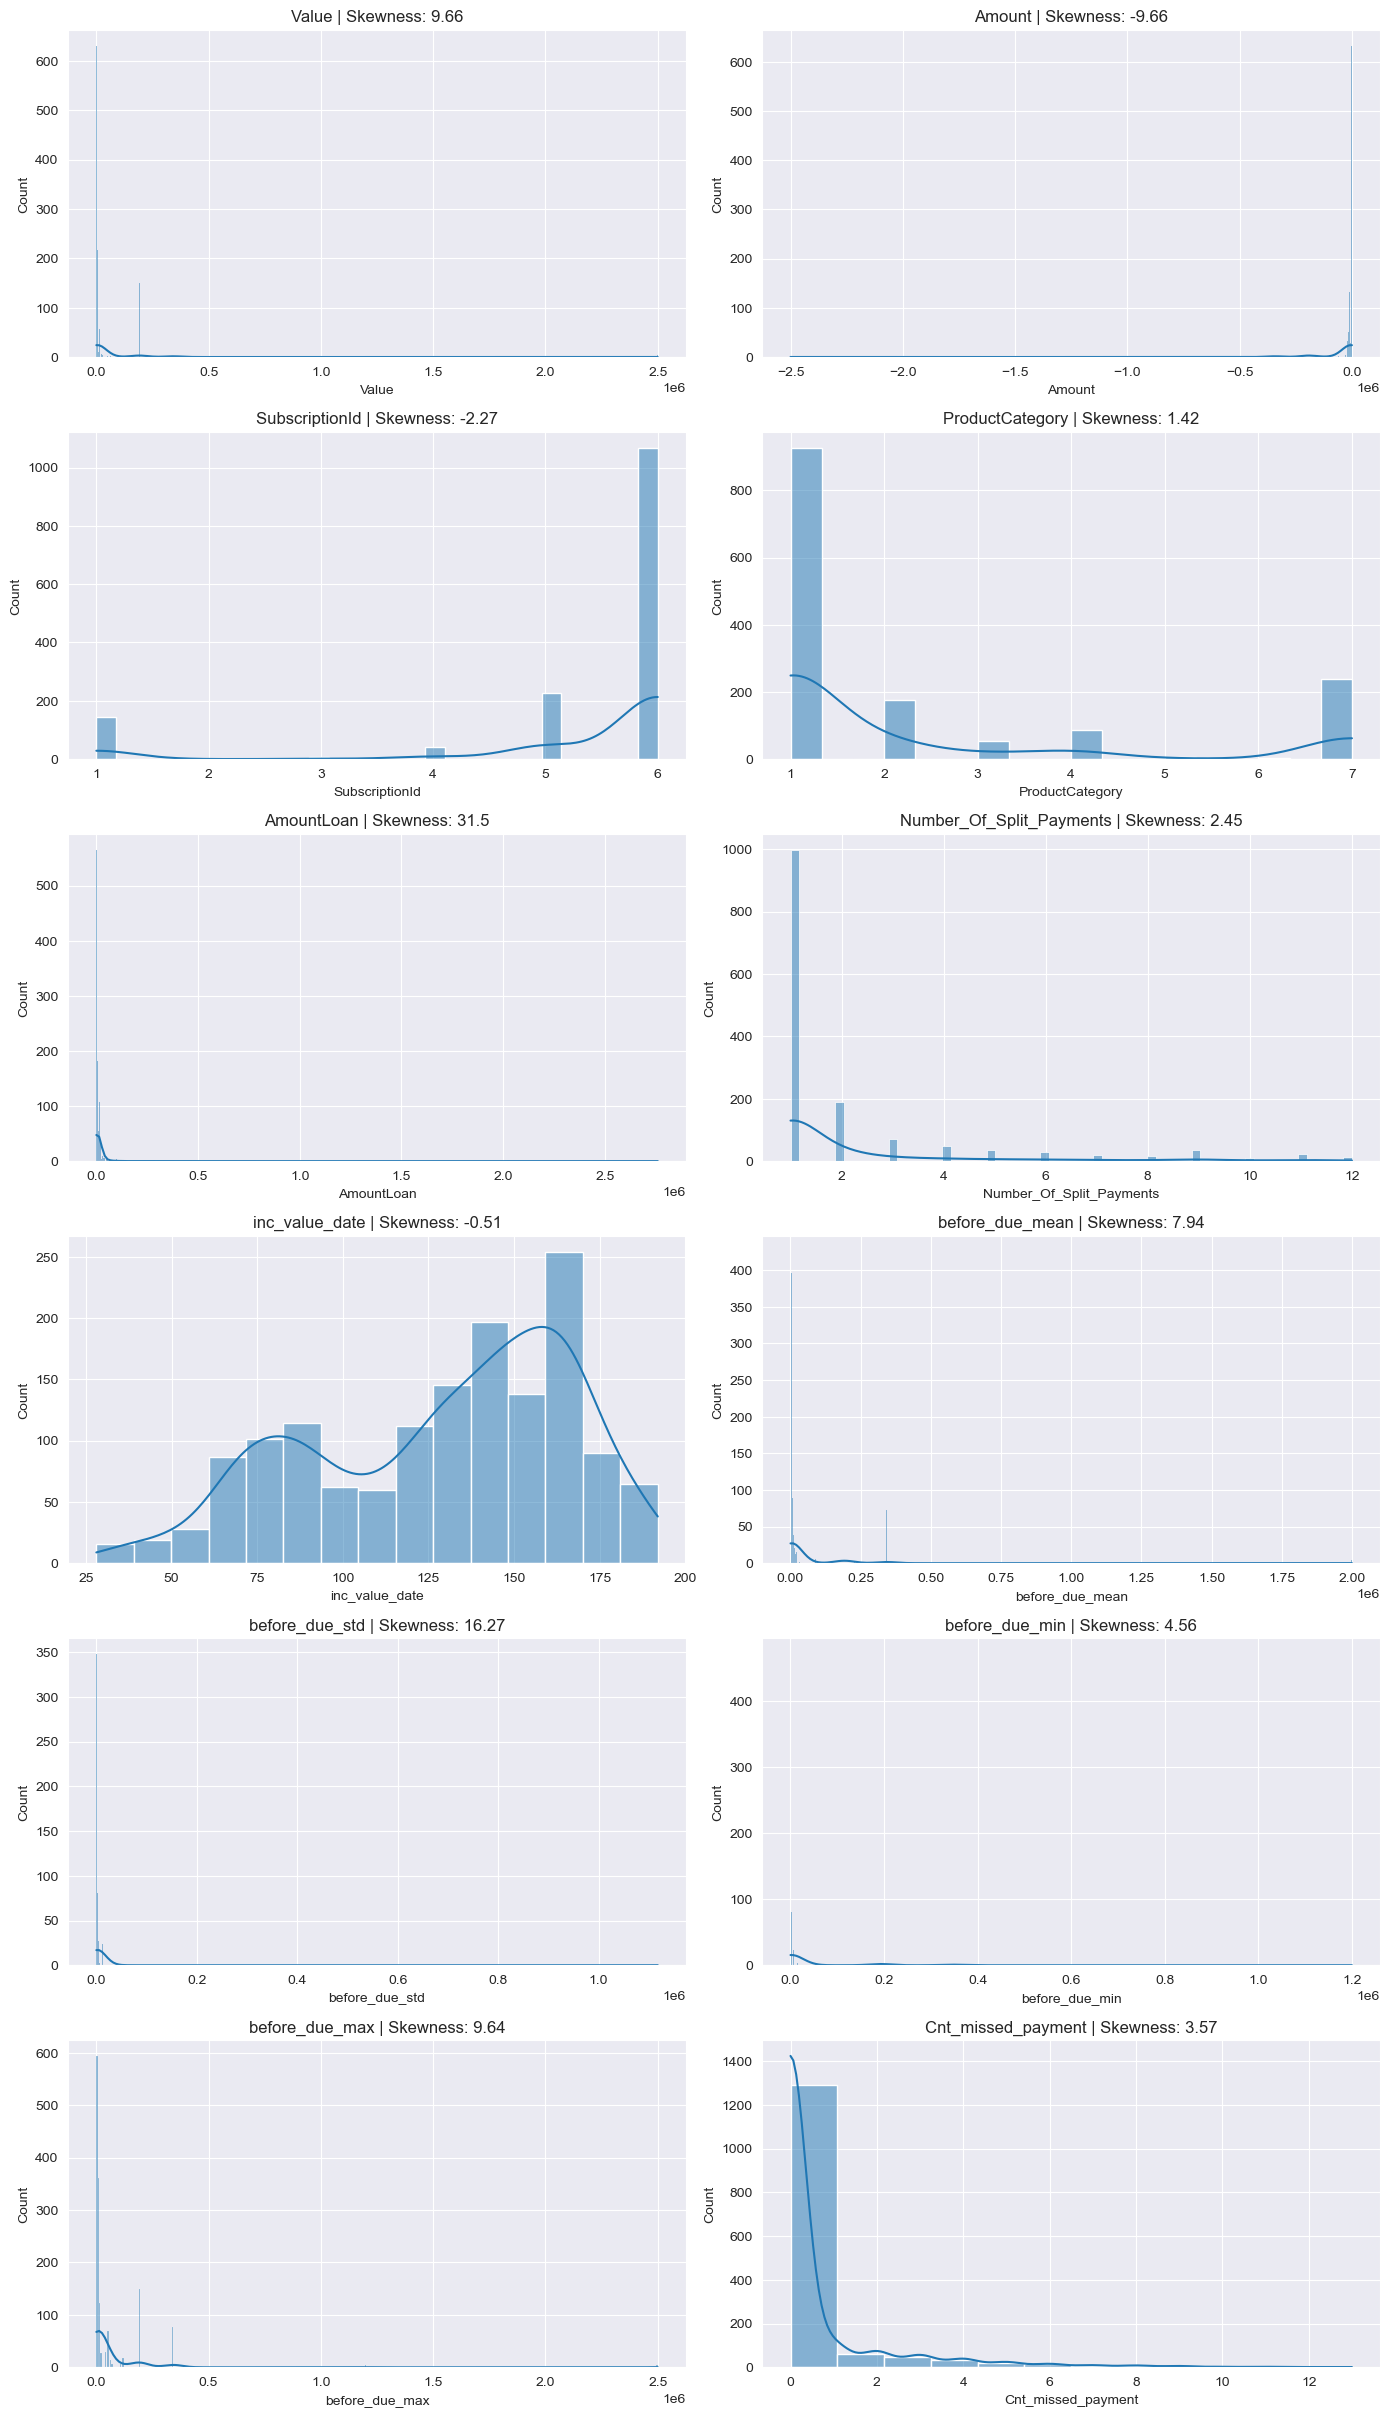

In [87]:
#set seaborn style
sns.set_style("darkgrid")

#identify the numerical columns
numerical_columns = mod_data.select_dtypes(include=["int64", "float64"]).columns

#plot distribustion for each numeric features
plt.figure(figsize=(14, len(numerical_columns) * 4))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(mod_data[feature], kde=True)
    plt.title(f'{feature} | Skewness: {round(mod_data[feature].skew(), 2)}')
    

#Adjust the layout and show plots
plt.tight_layout()
plt.show()

In [88]:
mod_data.to_csv('modified.csv', index=False)
display(mod_data)

,Value,Amount,SubscriptionId,ProductCategory,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_std,before_due_min,before_due_max,Cnt_missed_payment
9,10000.0,-10000.0,3,1,Accepted,10016.0,1,0,0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
10,10000.0,-10000.0,3,1,Accepted,584.0,1,0,0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
11,10000.0,-10000.0,3,1,Accepted,100.0,1,0,0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
13,5150.0,-5150.0,3,1,Accepted,5614.0,1,0,0,1,4,19,29,7172.738095,13247.189863,500.0,53500.0,0
14,515.0,-515.0,3,1,Accepted,544.0,1,0,0,1,4,19,29,7172.738095,13247.189863,500.0,53500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000.0,-2000.0,6,2,Accepted,2370.0,1,1,0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2096,5000.0,-5000.0,6,1,Accepted,5925.0,1,1,0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2097,5000.0,-5000.0,6,1,Accepted,7100.0,1,1,0,1,6,31,192,4800.000000,1622.639824,2000.0,7080.0,1
2098,1500.0,-1500.0,6,2,Accepted,1733.0,1,1,0,1,6,31,192,2500.000000,1695.582496,1500.0,5500.0,0


In [89]:
mod_data[mod_data['TransactionStatus'].values == 'Rejected'].count().TransactionStatus
mod_data[mod_data['TransactionStatus'].values == 'Accepted'].count().TransactionStatus

1488

In [90]:
mod_data[mod_data['TransactionStatus'].values == 'Rejected'].count().TransactionStatus

0

In [91]:
new_label = {'Accepted' : 1, 'Rejected' : 0}
mod_data.TransactionStatus = mod_data.TransactionStatus.map(new_label)

In [92]:
display(mod_data)

,Value,Amount,SubscriptionId,ProductCategory,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_std,before_due_min,before_due_max,Cnt_missed_payment
9,10000.0,-10000.0,3,1,1,10016.0,1,0,0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
10,10000.0,-10000.0,3,1,1,584.0,1,0,0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
11,10000.0,-10000.0,3,1,1,100.0,1,0,0,3,3,18,28,23838.235294,29330.229337,5000.0,118450.0,0
13,5150.0,-5150.0,3,1,1,5614.0,1,0,0,1,4,19,29,7172.738095,13247.189863,500.0,53500.0,0
14,515.0,-515.0,3,1,1,544.0,1,0,0,1,4,19,29,7172.738095,13247.189863,500.0,53500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000.0,-2000.0,6,2,1,2370.0,1,1,0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2096,5000.0,-5000.0,6,1,1,5925.0,1,1,0,1,5,30,191,2285.714286,1204.387583,1000.0,5000.0,0
2097,5000.0,-5000.0,6,1,1,7100.0,1,1,0,1,6,31,192,4800.000000,1622.639824,2000.0,7080.0,1
2098,1500.0,-1500.0,6,2,1,1733.0,1,1,0,1,6,31,192,2500.000000,1695.582496,1500.0,5500.0,0


Features Engineering and selections

FEATURES ENGINEERING

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler(feature_range=(0,1))

In [97]:
mod_data.Value = scaler.fit_transform(np.array(mod_data['Value']).reshape(-1,1))
mod_data.Amount = scaler.fit_transform(np.array(mod_data['Amount']).reshape(-1,1))
mod_data.SubscriptionId = scaler.fit_transform(np.array(mod_data['SubscriptionId']).reshape(-1,1))
mod_data.ProductCategory = scaler.fit_transform(np.array(mod_data['ProductCategory']).reshape(-1,1))
mod_data.AmountLoan = scaler.fit_transform(np.array(mod_data['AmountLoan']).reshape(-1,1))
mod_data.IsFinalPayBack = scaler.fit_transform(np.array(mod_data['IsFinalPayBack']).reshape(-1,1))
mod_data.IsThirdPartyConfirmed = scaler.fit_transform(np.array(mod_data['IsThirdPartyConfirmed']).reshape(-1,1))
cols = [
    'Number_Of_Split_Payments',
    'Day_Of_Week','Day_in_month','inc_value_date','before_due_mean','before_due_std', 'before_due_min','before_due_max','Cnt_missed_payment']

mod_data[cols] = scaler.fit_transform(data[cols])

In [98]:
display(mod_data)

,Value,Amount,SubscriptionId,ProductCategory,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_std,before_due_min,before_due_max,Cnt_missed_payment
9,0.003960,0.996040,0.4,0.000000,1,0.003611,1.0,0.0,0,0.181818,0.500000,0.566667,0.000000,0.011671,0.026239,0.004084,0.047189,0.000000
10,0.003960,0.996040,0.4,0.000000,1,0.000193,1.0,0.0,0,0.181818,0.500000,0.566667,0.000000,0.011671,0.026239,0.004084,0.047189,0.000000
11,0.003960,0.996040,0.4,0.000000,1,0.000018,1.0,0.0,0,0.181818,0.500000,0.566667,0.000000,0.011671,0.026239,0.004084,0.047189,0.000000
13,0.002020,0.997980,0.4,0.000000,1,0.002016,1.0,0.0,0,0.000000,0.666667,0.600000,0.006098,0.003337,0.011851,0.000333,0.021204,0.000000
14,0.000166,0.999834,0.4,0.000000,1,0.000179,1.0,0.0,0,0.000000,0.666667,0.600000,0.006098,0.003337,0.011851,0.000333,0.021204,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.000760,0.999240,1.0,0.166667,1,0.000841,1.0,1.0,0,0.000000,0.833333,0.966667,0.993902,0.000893,0.001077,0.000750,0.001800,0.000000
2096,0.001960,0.998040,1.0,0.000000,1,0.002129,1.0,1.0,0,0.000000,0.833333,0.966667,0.993902,0.000893,0.001077,0.000750,0.001800,0.000000
2097,0.001960,0.998040,1.0,0.000000,1,0.002554,1.0,1.0,0,0.000000,1.000000,1.000000,1.000000,0.002150,0.001452,0.001583,0.002633,0.076923
2098,0.000560,0.999440,1.0,0.166667,1,0.000610,1.0,1.0,0,0.000000,1.000000,1.000000,1.000000,0.001000,0.001517,0.001167,0.002000,0.000000


FEATURES SELECTION

In [100]:
#Using wrapper method--Lasso(least Absolute Shrinkage and Selection Operator)
from sklearn.linear_model import Lasso

In [101]:
y = mod_data['IsDefaulted']
X_scaled = mod_data.drop("IsDefaulted", axis=1)

In [102]:
display(X_scaled)

,Value,Amount,SubscriptionId,ProductCategory,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_std,before_due_min,before_due_max,Cnt_missed_payment
9,0.003960,0.996040,0.4,0.000000,1,0.003611,1.0,0.0,0.181818,0.500000,0.566667,0.000000,0.011671,0.026239,0.004084,0.047189,0.000000
10,0.003960,0.996040,0.4,0.000000,1,0.000193,1.0,0.0,0.181818,0.500000,0.566667,0.000000,0.011671,0.026239,0.004084,0.047189,0.000000
11,0.003960,0.996040,0.4,0.000000,1,0.000018,1.0,0.0,0.181818,0.500000,0.566667,0.000000,0.011671,0.026239,0.004084,0.047189,0.000000
13,0.002020,0.997980,0.4,0.000000,1,0.002016,1.0,0.0,0.000000,0.666667,0.600000,0.006098,0.003337,0.011851,0.000333,0.021204,0.000000
14,0.000166,0.999834,0.4,0.000000,1,0.000179,1.0,0.0,0.000000,0.666667,0.600000,0.006098,0.003337,0.011851,0.000333,0.021204,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.000760,0.999240,1.0,0.166667,1,0.000841,1.0,1.0,0.000000,0.833333,0.966667,0.993902,0.000893,0.001077,0.000750,0.001800,0.000000
2096,0.001960,0.998040,1.0,0.000000,1,0.002129,1.0,1.0,0.000000,0.833333,0.966667,0.993902,0.000893,0.001077,0.000750,0.001800,0.000000
2097,0.001960,0.998040,1.0,0.000000,1,0.002554,1.0,1.0,0.000000,1.000000,1.000000,1.000000,0.002150,0.001452,0.001583,0.002633,0.076923
2098,0.000560,0.999440,1.0,0.166667,1,0.000610,1.0,1.0,0.000000,1.000000,1.000000,1.000000,0.001000,0.001517,0.001167,0.002000,0.000000


In [103]:
X_scaled = X_scaled.drop('before_due_std', axis=1)

In [104]:
display(y)

9       0
10      0
11      0
13      0
14      0
       ..
2095    0
2096    0
2097    0
2098    0
2099    0
Name: IsDefaulted, Length: 1488, dtype: int32

In [105]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_scaled, y)

Lasso(alpha=0.2)

In [106]:
feature_names = [f"feature {i}" for i in range(X_scaled.shape[1])]
forest_importances = pd.Series(lasso.coef_, index=feature_names)

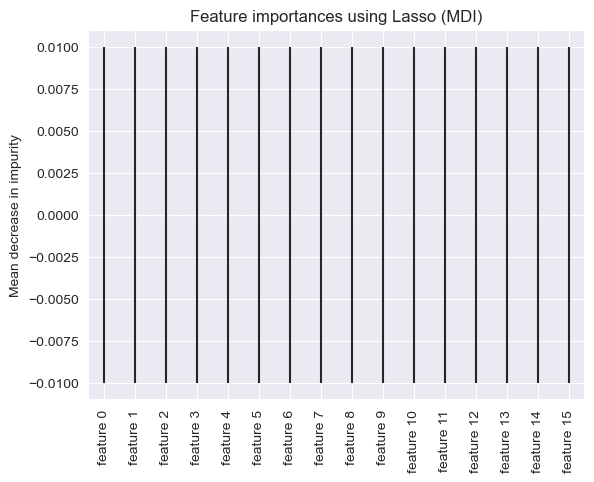

In [107]:
ig, ax = plt.subplots()
forest_importances.plot.bar(yerr=0.01, ax=ax)
ax.set_title("Feature importances using Lasso (MDI)")
ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()
plt.show()

In [108]:
display(X_scaled)

,Value,Amount,SubscriptionId,ProductCategory,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,Number_Of_Split_Payments,Day_Of_Week,Day_in_month,inc_value_date,before_due_mean,before_due_min,before_due_max,Cnt_missed_payment
9,0.003960,0.996040,0.4,0.000000,1,0.003611,1.0,0.0,0.181818,0.500000,0.566667,0.000000,0.011671,0.004084,0.047189,0.000000
10,0.003960,0.996040,0.4,0.000000,1,0.000193,1.0,0.0,0.181818,0.500000,0.566667,0.000000,0.011671,0.004084,0.047189,0.000000
11,0.003960,0.996040,0.4,0.000000,1,0.000018,1.0,0.0,0.181818,0.500000,0.566667,0.000000,0.011671,0.004084,0.047189,0.000000
13,0.002020,0.997980,0.4,0.000000,1,0.002016,1.0,0.0,0.000000,0.666667,0.600000,0.006098,0.003337,0.000333,0.021204,0.000000
14,0.000166,0.999834,0.4,0.000000,1,0.000179,1.0,0.0,0.000000,0.666667,0.600000,0.006098,0.003337,0.000333,0.021204,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.000760,0.999240,1.0,0.166667,1,0.000841,1.0,1.0,0.000000,0.833333,0.966667,0.993902,0.000893,0.000750,0.001800,0.000000
2096,0.001960,0.998040,1.0,0.000000,1,0.002129,1.0,1.0,0.000000,0.833333,0.966667,0.993902,0.000893,0.000750,0.001800,0.000000
2097,0.001960,0.998040,1.0,0.000000,1,0.002554,1.0,1.0,0.000000,1.000000,1.000000,1.000000,0.002150,0.001583,0.002633,0.076923
2098,0.000560,0.999440,1.0,0.166667,1,0.000610,1.0,1.0,0.000000,1.000000,1.000000,1.000000,0.001000,0.001167,0.002000,0.000000


In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
rf = RandomForestRegressor(
    n_estimators = 100
)

In [111]:
rf.fit(X_scaled, y)

RandomForestRegressor()

In [112]:
feature_importances = rf.feature_importances_

In [113]:
display(feature_importances)

array([0.0756441 , 0.12895774, 0.00122612, 0.01136806, 0.        ,
       0.10557269, 0.02702841, 0.00390475, 0.20890115, 0.01169513,
       0.04759119, 0.01607087, 0.02368884, 0.3057605 , 0.01972598,
       0.01286446])

In [114]:
features_importance_df = pd.DataFrame({
    "Features": X_scaled.columns,
    "Importance": feature_importances
})

In [115]:
display(features_importance_df)

,Features,Importance
0,Value,0.075644
1,Amount,0.128958
2,SubscriptionId,0.001226
3,ProductCategory,0.011368
4,TransactionStatus,0.000000
5,AmountLoan,0.105573
6,IsFinalPayBack,0.027028
7,IsThirdPartyConfirmed,0.003905
8,Number_Of_Split_Payments,0.208901
9,Day_Of_Week,0.011695


In [116]:
feature_importance_df = features_importance_df.sort_values(by="Importance", ascending=False)

In [117]:
display(feature_importance_df)

,Features,Importance
13,before_due_min,0.305760
8,Number_Of_Split_Payments,0.208901
1,Amount,0.128958
5,AmountLoan,0.105573
0,Value,0.075644
10,Day_in_month,0.047591
6,IsFinalPayBack,0.027028
12,before_due_mean,0.023689
14,before_due_max,0.019726
11,inc_value_date,0.016071


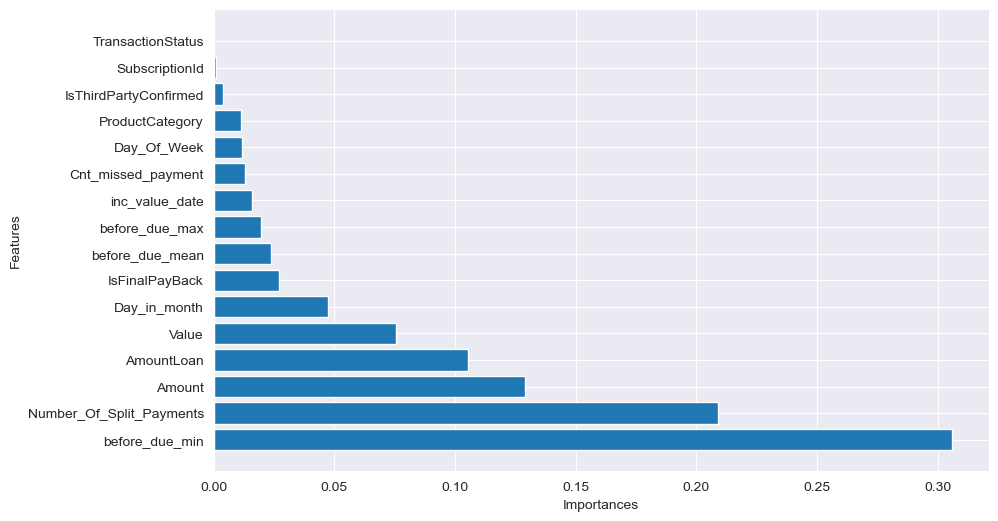

In [118]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'])
plt.xlabel("Importances")
plt.ylabel("Features")
plt.show()

In [119]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [120]:
bestFeatures = SelectKBest(
    score_func=chi2,
    k=15
)

In [121]:
#training to get the best features
fit = bestFeatures.fit(X_scaled, y)

dfscore = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X_scaled.columns)

#joining to form the new dataframe
dataa = pd.concat([features, dfscore], axis=1)

#define the columns of the dataa dataframe
dataa.columns = ['Features','Scores']

In [122]:
# display(dataa)

In [123]:
feat = dataa.nlargest(13, 'Scores')
print(feat)

                    Features      Scores
3            ProductCategory  372.739871
6             IsFinalPayBack  141.234200
13            before_due_min   99.567507
8   Number_Of_Split_Payments   69.846517
12           before_due_mean   43.806636
0                      Value   35.409832
14            before_due_max   27.234892
11            inc_value_date    6.837260
9                Day_Of_Week    3.333169
15        Cnt_missed_payment    0.837295
1                     Amount    0.754303
2             SubscriptionId    0.413009
5                 AmountLoan    0.259219


<Axes: >

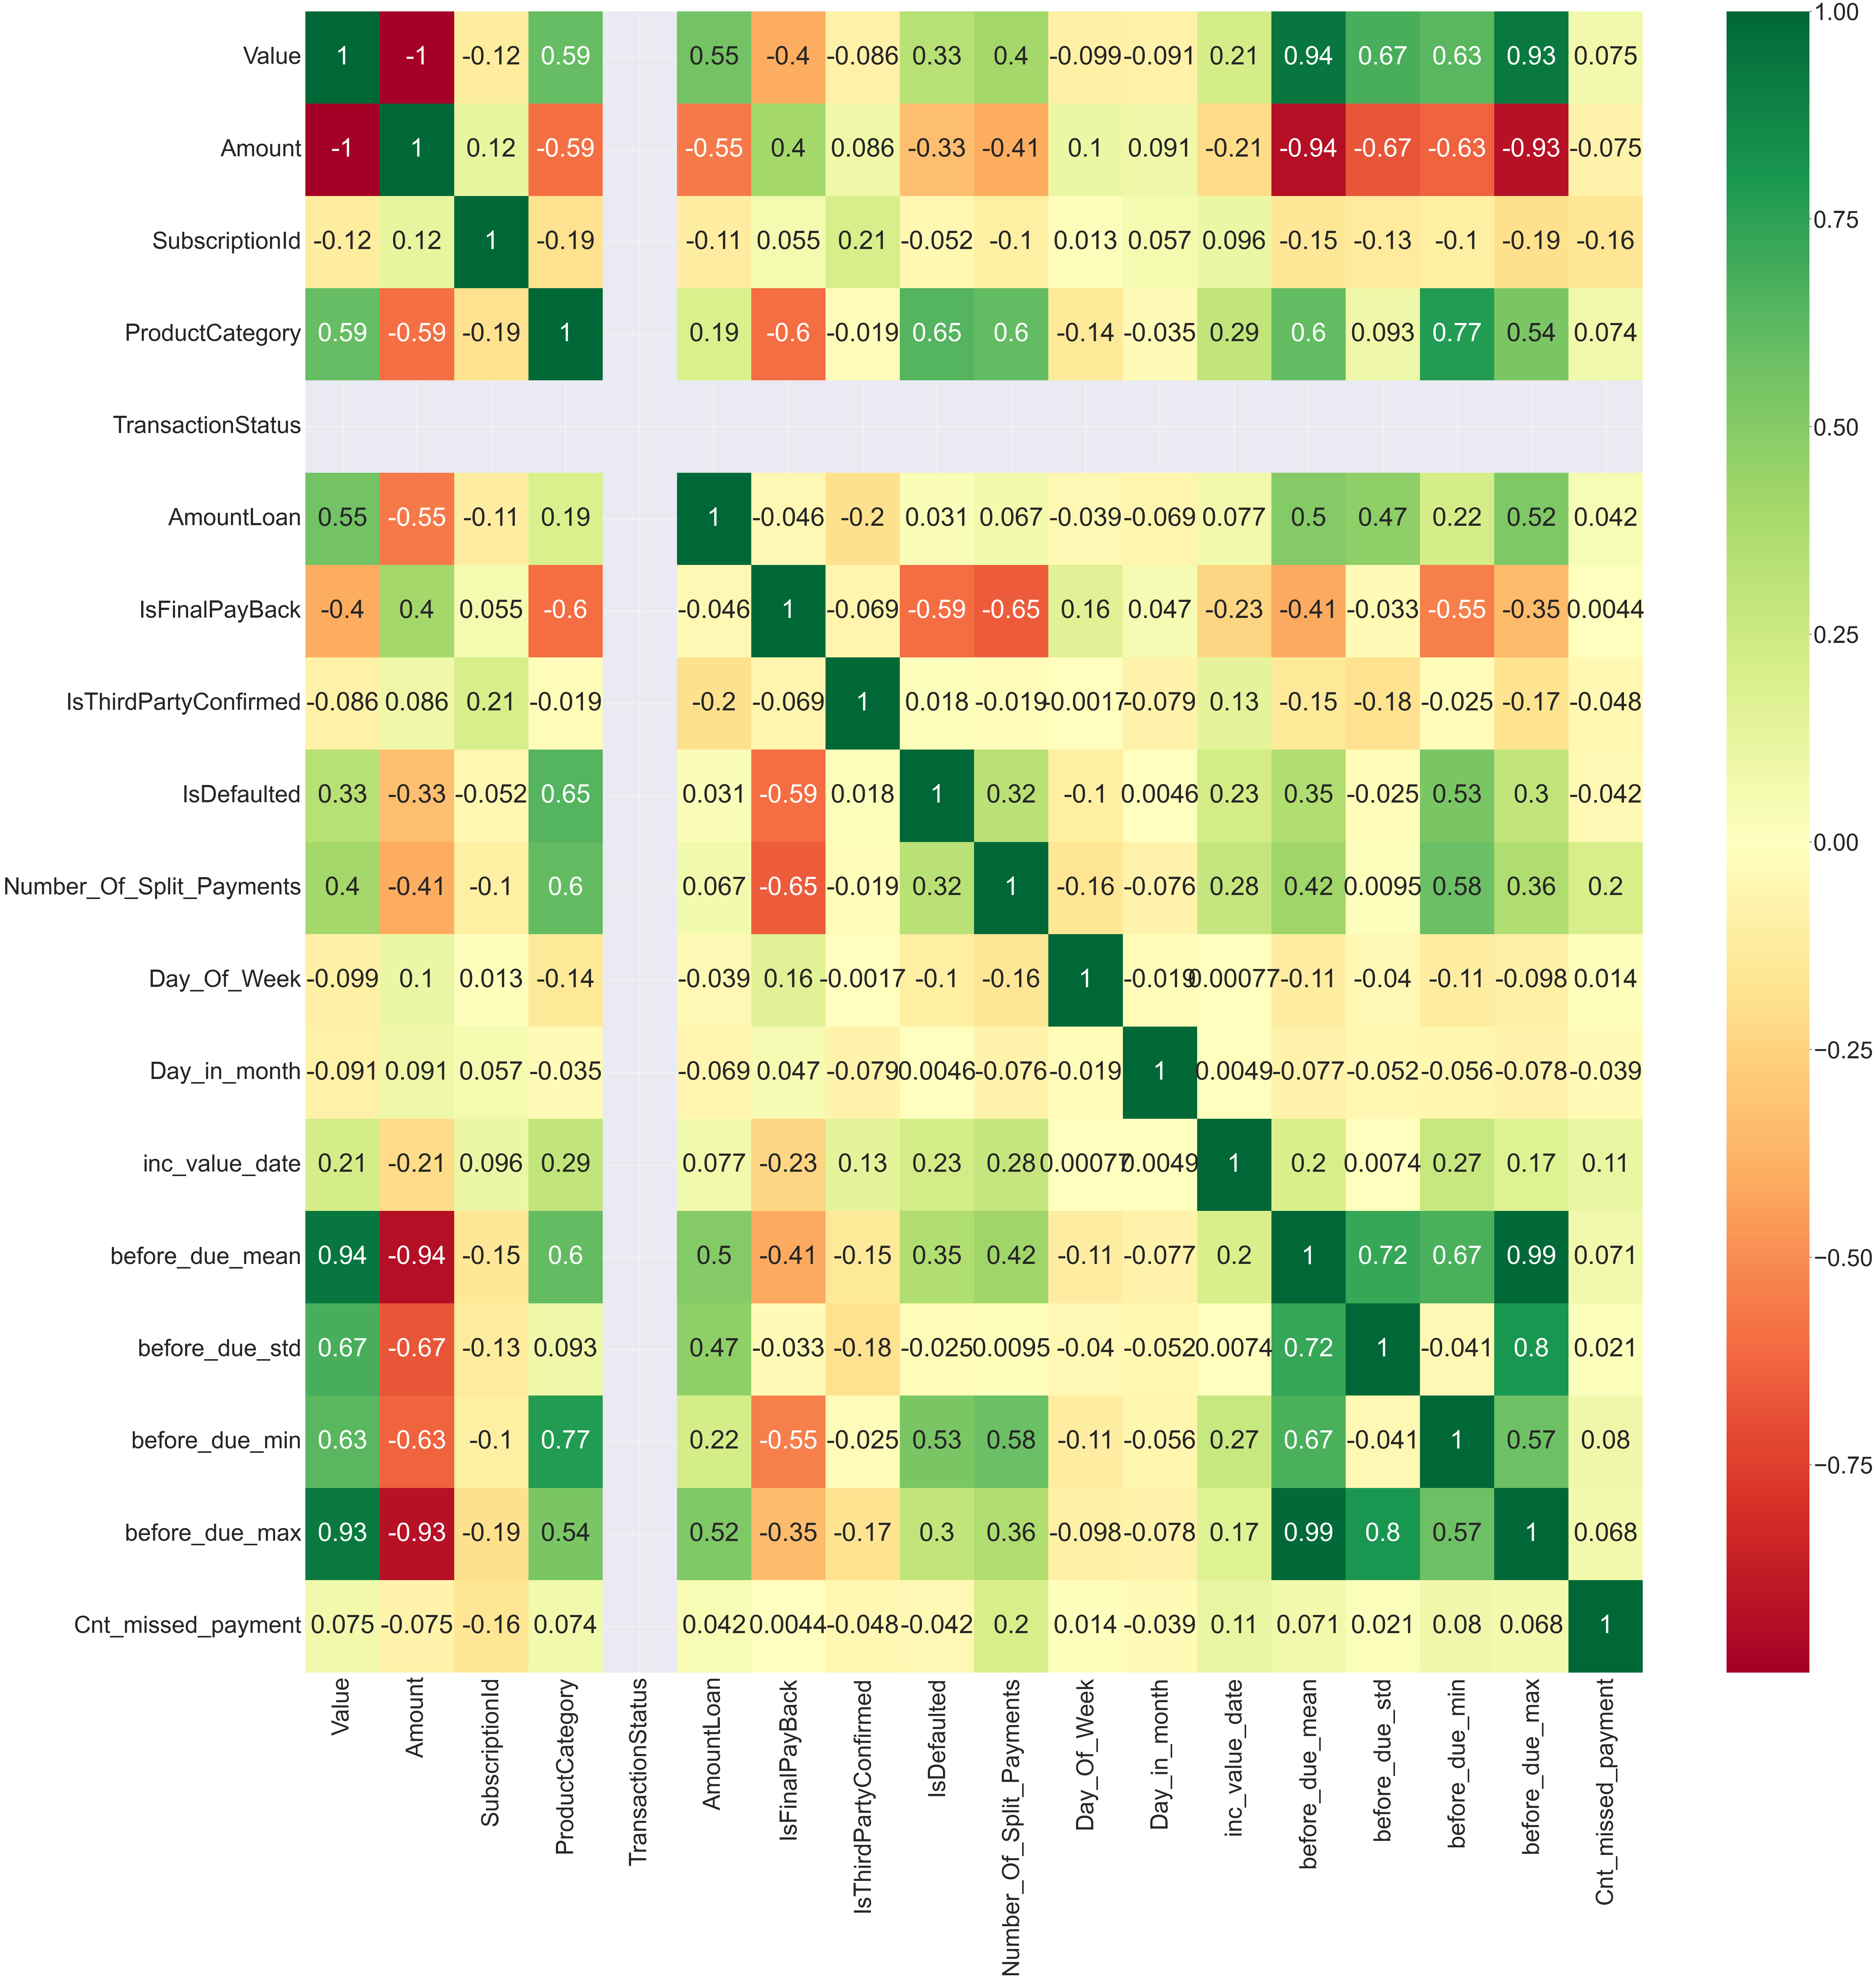

In [124]:

plt.figure(figsize=(70,70))

#plot heat map
sns.set(font_scale = 5)
# to show number set annot=True
d = sns.heatmap(mod_data.corr(),annot=True, cmap="RdYlGn")
d

In [125]:
important_features = ['Value','ProductCategory','AmountLoan','IsThirdPartyConfirmed','Number_Of_Split_Payments','before_due_max'
                     
                      'before_due_min','before_due_mean','inc_value_date'
                     ]

In [126]:
feat.Features

3              ProductCategory
6               IsFinalPayBack
13              before_due_min
8     Number_Of_Split_Payments
12             before_due_mean
0                        Value
14              before_due_max
11              inc_value_date
9                  Day_Of_Week
15          Cnt_missed_payment
1                       Amount
2               SubscriptionId
5                   AmountLoan
Name: Features, dtype: object

In [127]:
X_scaled = X_scaled[feat.Features]

In [128]:
X_scaled

,ProductCategory,IsFinalPayBack,before_due_min,Number_Of_Split_Payments,before_due_mean,Value,before_due_max,inc_value_date,Day_Of_Week,Cnt_missed_payment,Amount,SubscriptionId,AmountLoan
9,0.000000,1.0,0.004084,0.181818,0.011671,0.003960,0.047189,0.000000,0.500000,0.000000,0.996040,0.4,0.003611
10,0.000000,1.0,0.004084,0.181818,0.011671,0.003960,0.047189,0.000000,0.500000,0.000000,0.996040,0.4,0.000193
11,0.000000,1.0,0.004084,0.181818,0.011671,0.003960,0.047189,0.000000,0.500000,0.000000,0.996040,0.4,0.000018
13,0.000000,1.0,0.000333,0.000000,0.003337,0.002020,0.021204,0.006098,0.666667,0.000000,0.997980,0.4,0.002016
14,0.000000,1.0,0.000333,0.000000,0.003337,0.000166,0.021204,0.006098,0.666667,0.000000,0.999834,0.4,0.000179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.166667,1.0,0.000750,0.000000,0.000893,0.000760,0.001800,0.993902,0.833333,0.000000,0.999240,1.0,0.000841
2096,0.000000,1.0,0.000750,0.000000,0.000893,0.001960,0.001800,0.993902,0.833333,0.000000,0.998040,1.0,0.002129
2097,0.000000,1.0,0.001583,0.000000,0.002150,0.001960,0.002633,1.000000,1.000000,0.076923,0.998040,1.0,0.002554
2098,0.166667,1.0,0.001167,0.000000,0.001000,0.000560,0.002000,1.000000,1.000000,0.000000,0.999440,1.0,0.000610


In [129]:
#spliting the dataset into training and test dataset
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test, y_train, y_test = train_test_split(X_scaled, y,stratify=y, test_size=0.2, random_state=10)

In [131]:
#build the model: neutral network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop

In [132]:
#create a simple neutral network

optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
optimizer0 = RMSprop(learning_rate=0.01)
model = Sequential()
model.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(32, activation='relu'),
         )
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))


#compile the model
model.compile(
optimizer=optimizer,
loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
model.fit(X_train, y_train, epochs=10,
         batch_size=32, validation_split=0.2)

C:\Users\ISSA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8744 - loss: 0.4521 - val_accuracy: 0.8613 - val_loss: 0.3197
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8936 - loss: 0.2607 - val_accuracy: 0.8613 - val_loss: 0.2097
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9034 - loss: 0.2037 - val_accuracy: 0.8613 - val_loss: 0.1614
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8977 - loss: 0.1910 - val_accuracy: 0.9706 - val_loss: 0.1356
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9047 - loss: 0.1851 - val_accuracy: 0.9790 - val_loss: 0.1275
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9012 - loss: 0.1839 - val_accuracy: 0.9832 - val_loss: 0.1225
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9299 - loss: 0.1620 - val_accuracy: 0.9832 - val_loss: 0.1186
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9274 - loss: 0.1781 - val_accuracy: 0.9832 - val_los

In [133]:
#Evalution of the model
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
0.9782124681933843


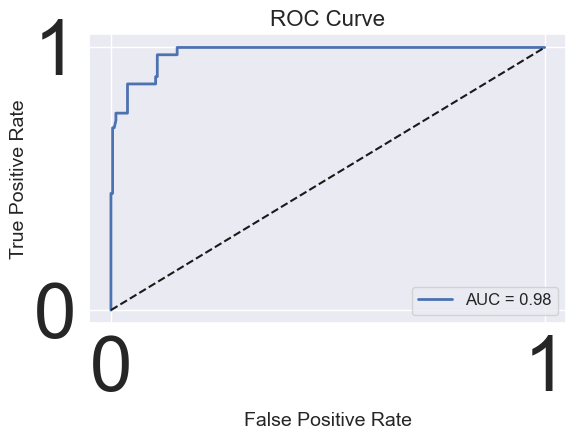

In [134]:
#Predict probabilities for test set
y_pred_proba = model.predict(X_test)

#Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
#Plot ROC curve
print(auc_roc)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)  # Diagonal reference line

# Labels and title
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)

# Add grid
plt.grid(True)

# Adjust font size of the legend
plt.legend(loc='lower right', fontsize=12)

# Use tight layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

In [135]:
#evaluate the model
model.evaluate(X_test, y_test, verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9509 - loss: 0.1242 


[0.14094612002372742, 0.9429529905319214]

In [136]:
modle = RandomForestClassifier(
)

In [137]:
modle.fit(X_train, y_train)

RandomForestClassifier()

In [138]:
pred = modle.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, y_test)

In [140]:
print(acc)

0.9832214765100671


In [141]:
# lightbgbm
# catboost
# xgboost
xgb = XGBClassifier(max_depth=4,colsample_bytree=0.6,min_child_weight=10,learning_rate=0.25,n_estimators=100,objective = "binary:logistic",random_state=9)
xgb.fit(X_train,y_train)
val_pred=xgb.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,val_pred))

0.9858990670059372


ROC AUC Score: 0.99


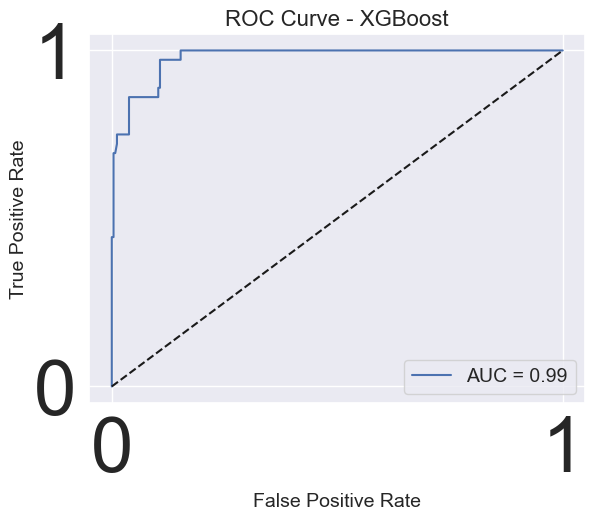

In [142]:
# Compute ROC AUC score
auc_roc = roc_auc_score(y_test, val_pred)
print(f"ROC AUC Score: {auc_roc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve - XGBoost", fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [143]:
data.to_csv('New_dataset.csv', index=False)

In [146]:
import lightgbm as lgb

In [147]:
# Create datasets for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [148]:
# Set parameters
params = {
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Trees
    'objective': 'binary',  # Binary classification
    'metric': ['binary_logloss', 'auc'],  # Metrics to evaluate the model
    'learning_rate': 0.05,
    'num_leaves': 31,  # Can be tuned
    'max_depth': -1,  # Can be tuned
    'feature_fraction': 0.8,  # Can be tuned (fraction of features used)
    'bagging_fraction': 0.8,  # Can be tuned (fraction of data used)
    'bagging_freq': 5,  # Bagging frequency
    'verbose': 0
}


In [149]:
model = lgb.train(params, 
                  train_data, 
                  num_boost_round=100,  # Maximum number of boosting iterations
                  valid_sets=[train_data, test_data]
                 )  # Stop if no improvement for 100 rounds


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [150]:
y_pred_proba1 = model.predict(X_test, num_iteration=model.best_iteration)

In [151]:
y_pred1 = [1 if pred > 0.5 else 0 for pred in y_pred_proba]

In [154]:
accuracy1 = accuracy_score(y_test, y_pred1)
roc_auc1 = roc_auc_score(y_test, y_pred_proba1)
print(f'Accuracy: {accuracy1:.4f}')
print(f'ROC AUC: {roc_auc1:.4f}')


Accuracy: 0.9430
ROC AUC: 0.9985


ROC AUC Score: 1.00


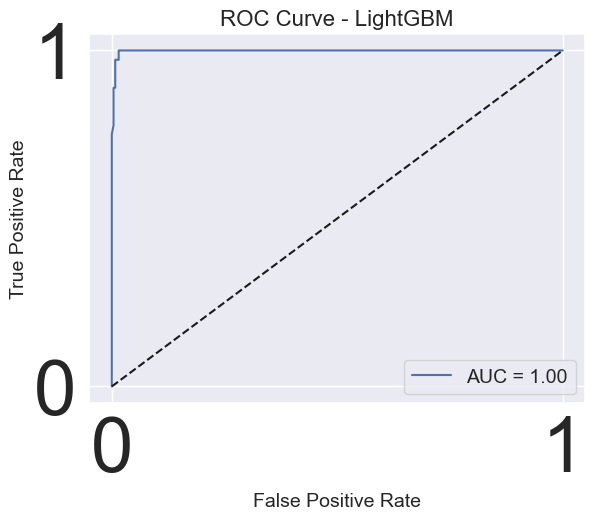

In [156]:

print(f"ROC AUC Score: {roc_auc1:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve - LightGBM", fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.show()


In [157]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Accuracy
accuracy2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy2:.2f}")


Accuracy: 0.98


ROC AUC Score: 0.99


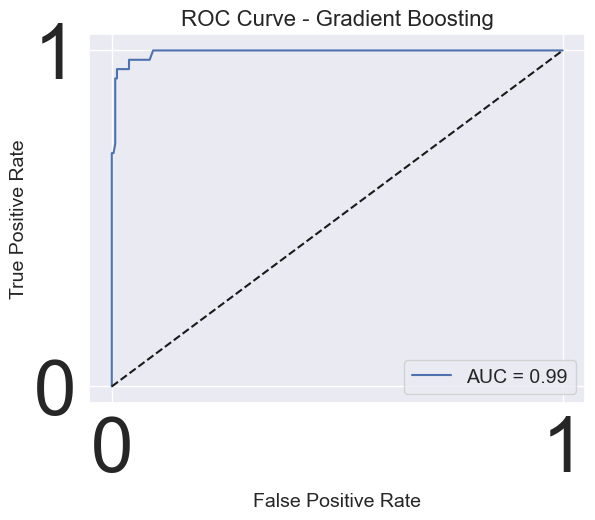

In [158]:
# Get the predicted probabilities for the positive class
y_pred_proba2 = gb_model.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
auc_roc2 = roc_auc_score(y_test, y_pred_proba2)
print(f"ROC AUC Score: {auc_roc2:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba2)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve - Gradient Boosting", fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [159]:
from catboost import CatBoostClassifier

# Initialize the model
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

# Train the model
cat_model.fit(X_train, y_train, verbose=0)

# Predictions
y_pred3 = cat_model.predict(X_test)

# Accuracy
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3:.2f}")


Accuracy: 0.99


ROC AUC Score: 0.99


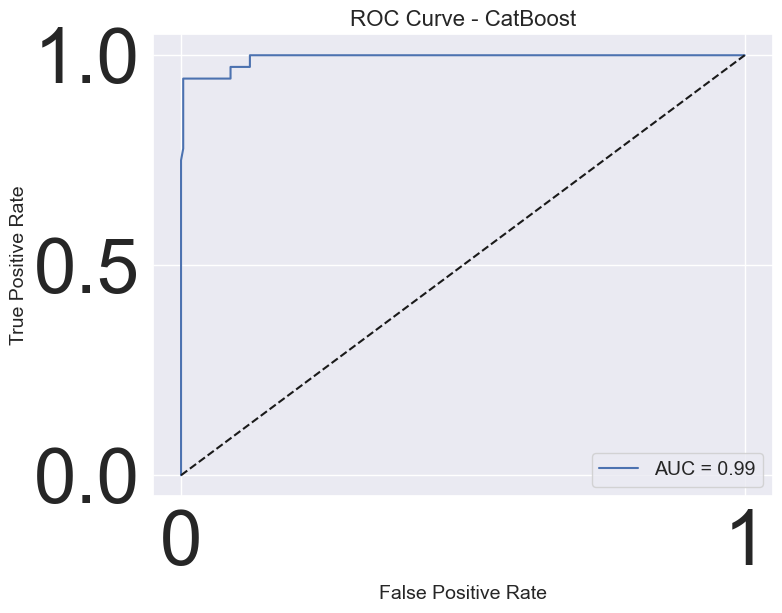

In [160]:
# Get the predicted probabilities for the positive class
y_pred_proba3 = cat_model.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
auc_roc0 = roc_auc_score(y_test, y_pred_proba3)
print(f"ROC AUC Score: {auc_roc0:.2f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba3)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc0:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve - CatBoost", fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.show()